In [18]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

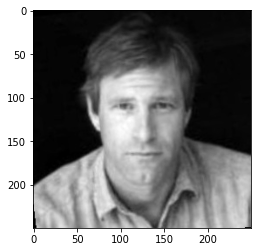

In [27]:
img = mpimg.imread('face_data/Aaron_Eckhart/Aaron_Eckhart_0001.jpg')
plt.imshow(imgGray, cmap='gray')
plt.show()

In [16]:
R,G,B = img.T

In [20]:
imgGray = (0.2989 * R + 0.5870 * G + 0.1140 * B).T

In [32]:
np.reshape(imgGray, -1)

(62500,)

In [46]:
Z[0] = np.reshape(imgGray, -1)

In [47]:
Z

array([[0.   , 0.   , 0.   , ..., 1.026, 1.955, 1.955],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ]])

In [2]:
def load_image(file):
    img = mpimg.imread(file) #read img
    R,G,B = img.T #get RGB comps
    #Transform to Grayscale and reshape to n*nx1 vector
    return np.reshape((0.2989 * R + 0.5870 * G + 0.1140 * B).T, -1)
    

In [22]:
def getZ(files, mean_centered = True):
    Z = np.zeros((len(files), 62500)) #Empty Data matrix of numFiles x imgVectorSize
    for idx, file in enumerate(tqdm(files)):
        Z[idx] = load_image(file) #put to Z
    
    if mean_centered:
        #Subtract mean 'face'
        Z -= np.mean(Z, axis=0)
    return Z

In [4]:
def get_all_files(root = 'face_data'):
    files = []
    for file in os.listdir(root):
        files.extend([root + '/' + file + '/' + f for f in os.listdir(root + '/' + file)])
    
    return files

In [30]:
Z = getZ(get_all_files())

100%|██████████| 13233/13233 [00:20<00:00, 660.94it/s]


In [29]:
Z[0].shape

(62500,)

In [ ]:
np.cov(Z.T)

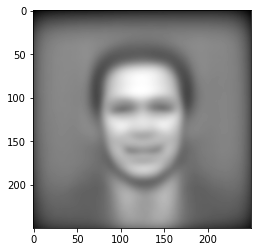

In [24]:
#Mean face!
plt.imshow(np.reshape(np.mean(Z,axis=0), (250,250) ), cmap='gray')
plt.show()

In [ ]:
np.linalg.eig(np.array([[1,2],[2,1]]))